<a href="https://www.kaggle.com/code/yunusemreakca/rainfallprediction?scriptVersionId=230831533" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# RainFall PredictionML

<a id = "2"> </a>
## Python Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import uniform, randint
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")

In [3]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,730.0,2554.500000,210.877136,2190.0,2372.250,2554.50,2736.750,2919.0
day,730.0,183.000000,105.438271,1.0,92.000,183.00,274.000,365.0
pressure,730.0,1013.503014,5.505871,1000.0,1008.725,1012.70,1017.600,1032.2
maxtemp,730.0,26.372466,5.672521,7.4,21.600,27.80,31.000,35.8
temparature,730.0,23.963288,5.278098,5.9,19.825,25.65,28.375,31.8
mintemp,730.0,22.110274,5.170744,4.2,17.825,23.90,26.400,29.1
dewpoint,730.0,20.460137,5.391169,-0.0,16.800,22.30,25.000,26.7
humidity,730.0,82.669863,7.818714,39.0,77.250,82.00,89.000,98.0
cloud,730.0,76.360274,17.934121,0.0,69.000,83.00,88.000,100.0
sunshine,730.0,3.664384,3.639272,0.0,0.325,2.20,6.675,11.8


In [7]:
train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [8]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [9]:
train["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

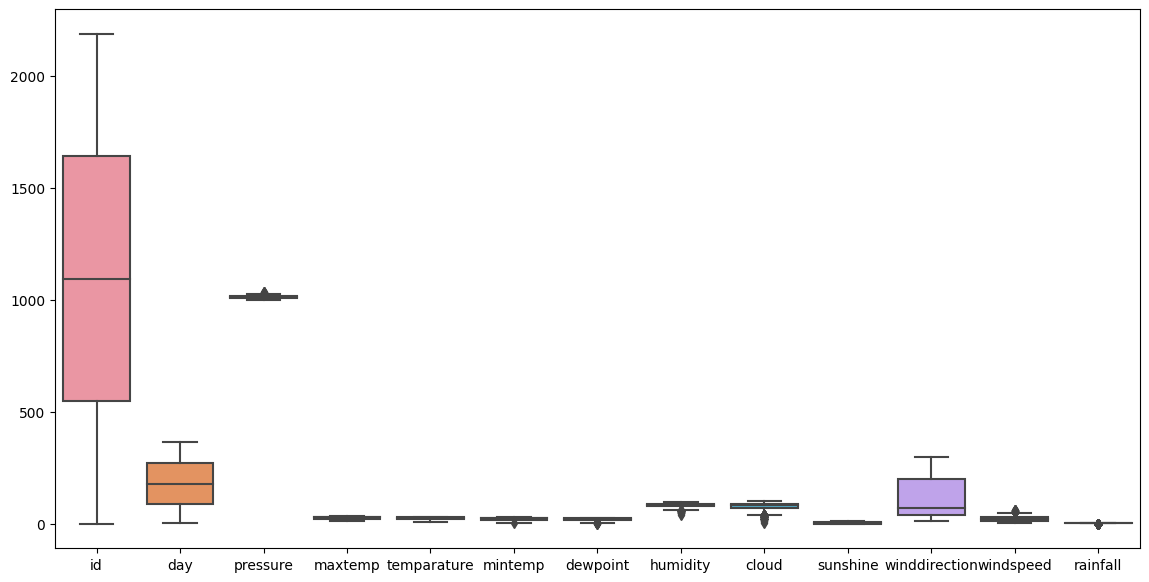

In [10]:
plt.figure(figsize =(14,7))
sns.boxplot(train)
plt.show()

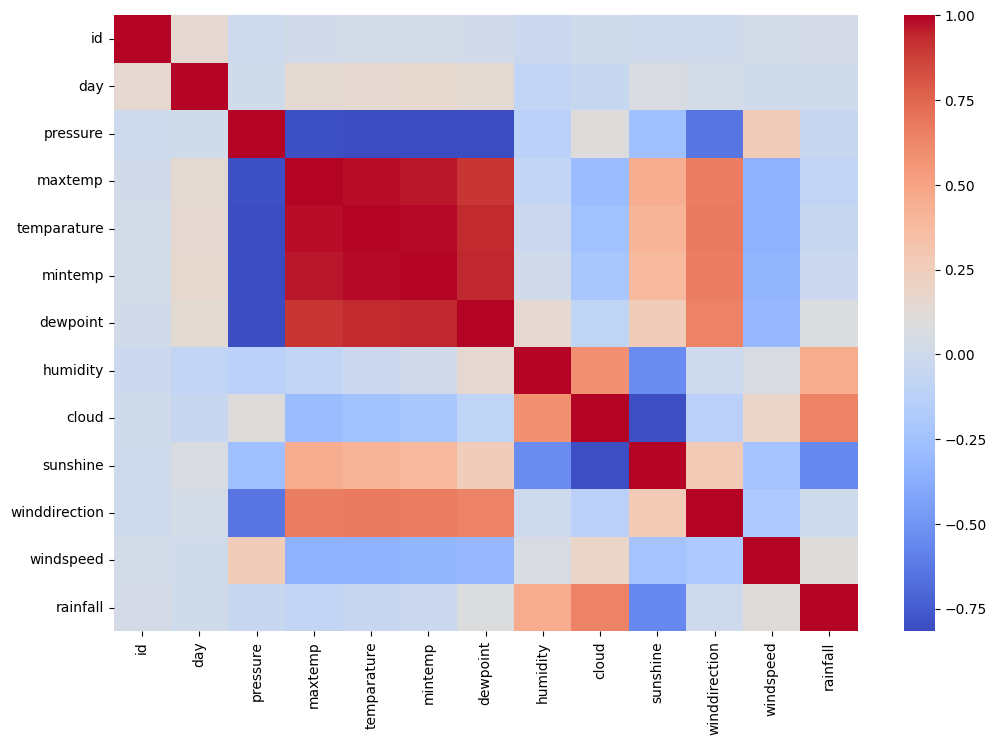

In [11]:
corr = train.corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr,cmap ="coolwarm")
plt.show()

In [12]:
def get_season(day):
    if 80 <= day <= 171:
        return "spring"
    elif 172 <= day <= 263:
        return "summer"
    elif 264 <= day <= 354:
        return "fall"
    else:
        return "winter"
        
train["season"] = train["day"].apply(get_season)
test["season"] = test["day"].apply(get_season)

train["temp_range"] = train["maxtemp"] - train["mintemp"]
test["temp_range"] = test["maxtemp"] - test["mintemp"]

train["dew_humidity_ratio"] = train["dewpoint"] / (train["humidity"] + 1e-5)
test["dew_humidity_ratio"] = test["dewpoint"] / (test["humidity"] + 1e-5)

train["temp_dew_diff"] = train["temparature"] - train["dewpoint"]
test["temp_dew_diff"] = test["temparature"] - test["dewpoint"]

train["cloud_sun_ratio"] = train["cloud"] / (train["sunshine"] + 1e-5)
test["cloud_sun_ratio"] = test["cloud"] / (test["sunshine"] + 1e-5)

train["low_sun"] = (train["sunshine"] < 1).astype(int)
test["low_sun"] = (test["sunshine"] < 1).astype(int)

train["cloud_humidity"] = train["humidity"] * train["cloud"]
test["cloud_humidity"] = test["humidity"] * test["cloud"]

train["temp_humidity"] = train["humidity"] * train["temp_dew_diff"]
test["temp_humidity"] = test["humidity"] * test["temp_dew_diff"]

season_map = {"winter": 0, "spring": 1, "summer": 2, "fall": 3}

train["season_num"] = train["season"].map(season_map)
test["season_num"] = test["season"].map(season_map)

train["cloud_sun_season"] = train["cloud_sun_ratio"] * train["season_num"]
test["cloud_sun_season"] = test["cloud_sun_ratio"] * test["season_num"]

train["cloud_sun_intersect"] = train["cloud"] * train["sunshine"]
test["cloud_sun_intersect"] = test["cloud"] * test["sunshine"]

train["cloud_humidity_intersect"] = train["cloud"] * train["humidity"]
test["cloud_humidity_intersect"] = test["cloud"] * test["humidity"]

train["cloud_sun_intersect"] = train["cloud"] / (train["sunshine"] + 1e-3)
test["cloud_sun_intersect"] = test["cloud"] / (test["sunshine"] + 1e-3)

train["humidity_dewpoint_intersect"] = train["humidity"] * train["dewpoint"]
test["humidity_dewpoint_intersect"] = test["humidity"] * test["dewpoint"]

train["sun_wind_intersect"] = train["sunshine"] / (train["windspeed"] + 1e-3)
test["sun_wind_intersect"] = test["sunshine"] / (test["windspeed"] + 1e-3)

train["cloud_low_sun_intersect"] = train["cloud"] * train["low_sun"]
test["cloud_low_sun_intersect"] = test["cloud"] * test["low_sun"]

bool_cols = train.select_dtypes(include='bool').columns

for col in bool_cols:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)
    
train = train.drop(["season"],axis = 1)
test = test.drop(["season"], axis = 1)

In [13]:
test["winddirection"].fillna(test["winddirection"].mean(), inplace=True)

In [14]:
X = train.drop(["id", "rainfall"], axis=1)
y = train["rainfall"]

X_test = test.drop(["id"],axis = 1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes

In [15]:
NB_model = GaussianNB().fit(X_scaled,y)

In [16]:
scores = cross_val_score(NB_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")

Mean AUC: 0.8801


In [17]:
y_test_pred = NB_model.predict_proba(X_test_scaled)[:,1]

In [18]:
submission = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})

submission.to_csv("submission_naivebayes.csv", index=False)

# LogisticRegression

In [19]:
l1_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
scores = cross_val_score(l1_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")

Mean AUC: 0.8904


In [20]:
l1_model.fit(X_scaled , y)
y_test_pred = l1_model.predict_proba(X_test_scaled)[:,1]

In [21]:
submission = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})

submission.to_csv("submission_logreg.csv", index=False)

## Logistic Regression Final Model

In [22]:
lr = LogisticRegression(solver="liblinear", random_state=42)

param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "class_weight": [None, "balanced"],
    "solver" : ["liblinear"]
}

grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_scaled, y)


GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [23]:
grid.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
final_lr = LogisticRegression(solver="liblinear",penalty= "l2",class_weight = None,C=0.01, max_iter = 1000, random_state=42)
scores = cross_val_score(final_lr, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")
final_lr.fit(X_scaled,y)

Mean AUC: 0.8932


LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [25]:
y_test_pred = final_lr.predict_proba(X_test_scaled)[:, 1]

submission_lr = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})
submission_lr.to_csv("submission_logreg_final.csv", index=False)

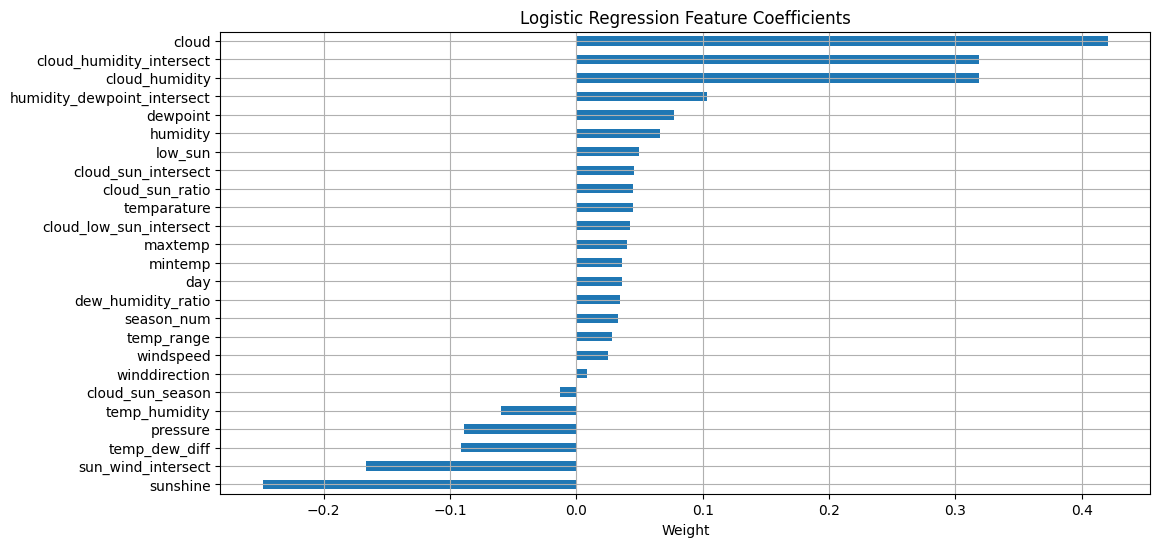

In [26]:
coef_df = pd.Series(final_lr.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(12, 6))
coef_df.plot(kind='barh')
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Weight")
plt.grid(True)
plt.show()


# XGB

In [27]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [28]:
model.fit(X_scaled ,y)
y_test_pred_xgb = model.predict_proba(X_test_scaled)[:,1]
submission_xgb = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred_xgb
})
submission_xgb.to_csv("submission_xgb.csv", index=False)


## Xgb Final Model with GridSearch

In [29]:
# best params :{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}

In [30]:
xgb_tuned_model = XGBClassifier(
    n_estimators = 200,
    colsample_bytree = 0.8,
    gamma = 1,
    learning_rate =0.05,
    max_depth = 5,
    reg_alpha = 0.1,
    reg_lambda = 1,
    subsample = 1,
    random_state = 42
)

In [31]:
xgb_tuned_model.fit(X_scaled, y)
y_test_pred_xgb = xgb_tuned_model.predict_proba(X_test_scaled)[:, 1]
submission_xgb_final = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred_xgb
})
submission_xgb_final.to_csv("submission_xgb_final_model.csv", index=False)

In [32]:
scores = cross_val_score(xgb_tuned_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")

Mean AUC: 0.8861


# SVC

In [33]:
# Best Params (SVC): {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
svc_model = SVC(C = 1,gamma = 0.001,kernel = "rbf",probability= True)
scores = cross_val_score(svc_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")
svc_model.fit(X_scaled, y)

Mean AUC: 0.8942


SVC(C=1, gamma=0.001, probability=True)

In [35]:
y_test_pred = svc_model.predict_proba(X_test_scaled)[:, 1]

submission_lr = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})
submission_lr.to_csv("submission_svc_final.csv", index=False)

# RandomForests 

In [36]:
# Best Params (RF): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

In [37]:
rf_model = RandomForestClassifier(n_estimators = 300,max_depth = 10,max_features = "sqrt",min_samples_leaf=4,min_samples_split=2)
scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")
rf_model.fit(X_scaled, y)

Mean AUC: 0.8907


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=300)

In [38]:
y_test_pred = rf_model.predict_proba(X_test_scaled)[:, 1]

submission_cat = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})

submission_cat.to_csv("submission_randomF.csv", index=False)

# ANN (Artificle Neural Network)

In [39]:
# best params : {'activation': 'relu','alpha': 0.01,'hidden_layer_sizes': (3, 5), 'solver': 'adam'}

In [40]:
mlpc = MLPClassifier(activation ='relu',alpha= 0.01,hidden_layer_sizes= (3, 5), solver = "adam")

In [41]:
scores = cross_val_score(mlpc, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")
mlpc.fit(X_scaled, y)

Mean AUC: 0.8858


MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 5))

In [42]:
y_test_pred = mlpc.predict_proba(X_test_scaled)[:, 1]

submission_cat = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})

submission_cat.to_csv("submission_mlpcs.csv", index=False)

# Catboost

In [43]:
cat_model = CatBoostClassifier(
    iterations = 300,
    depth = 4,
    learning_rate= 0.03,
    verbose = 0,
    random_state = 42
)
cat_model.fit(X_scaled,y)

In [44]:
# Best AUC: 0.8954545454545455
# Best Params: {'bagging_temperature': 0.2, 'depth': 4, 'iterations': 500, 'l2_leaf_reg': 7, 'learning_rate': 0.01, 'random_strength': 2}

In [45]:
final_cat = CatBoostClassifier(
    bagging_temperature=0.2,
    depth=6,
    iterations=700,
    l2_leaf_reg=7,
    learning_rate=0.03,
    random_strength=2,  
    eval_metric="AUC",
    verbose=0,
    random_seed=42
)
final_cat.fit(X_scaled,y)

In [46]:
y_test_pred = final_cat.predict_proba(X_test_scaled)[:, 1]

submission_cat = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_test_pred
})

submission_cat.to_csv("submission_catboost.csv", index=False)


# Voting

In [47]:
voting = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_tuned_model),
        ('cat', cat_model)
    ],
    voting='soft'
)
voting.fit(X_scaled, y)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=1,
                                            gr...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7b00165fc5e0>)],
                 voting='soft')

In [48]:
y_vote_pred = voting.predict_proba(X_test_scaled)[:, 1]

In [49]:
for name, model in voting.named_estimators_.items():
    y_pred = model.predict_proba(X_test_scaled)[:, 1]
    print(f"{name} top 5 possibilities from predictions: {y_pred[:5]}")


rf top 5 possibilities from predictions: [0.99317819 0.99886996 0.88198067 0.11585671 0.11930133]
xgb top 5 possibilities from predictions: [0.99170727 0.99156266 0.9495686  0.1190705  0.07514165]
cat top 5 possibilities from predictions: [0.98732549 0.98877191 0.96891641 0.10816486 0.05986816]


In [50]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_voting.csv", index=False)


## Voting L1 + l2 + catboost

In [51]:
voting_l1_l2_cat = VotingClassifier(
    estimators=[
        ('log_l2', final_lr),
        ('cat', final_cat),
        ('l1', l1_model),
    ],
    voting='soft'
)

voting_l1_l2_cat.fit(X_scaled, y)


VotingClassifier(estimators=[('log_l2',
                              LogisticRegression(C=0.01, max_iter=1000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7b00165fc9d0>),
                             ('l1',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [52]:
y_vote_pred = voting_l1_l2_cat.predict_proba(X_test_scaled)[:, 1]

In [53]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_best_voting.csv", index=False)

## Voting Naive + l2

In [54]:
voting_nb_l2 = VotingClassifier(
    estimators=[
        ('log_l2', final_lr),
        ("NaiveB",NB_model),
    ],
    voting='soft'
)

voting_nb_l2.fit(X_scaled, y)
y_vote_pred = voting_nb_l2.predict_proba(X_test_scaled)[:, 1]

In [55]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_nb_l2_voting.csv", index=False)

## Voting Svc + l1 + l2 

In [56]:
voting_l1_svc_l2 = VotingClassifier(
    estimators=[
        ('log_l2', final_lr),
        ("l1",l1_model),
        ("svc",svc_model)
    ],
    voting='soft'
)

voting_l1_svc_l2.fit(X_scaled, y)
y_vote_pred = voting_l1_svc_l2.predict_proba(X_test_scaled)[:, 1]

In [57]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_l1_l2_svc_voting.csv", index=False)

## Voting l2 + ANN+ Xgboost + Svc 

In [58]:
voting_xgb_svc_l2_ann = VotingClassifier(
    estimators=[
        ('log_l2', final_lr),
        ("ANN",mlpc),
        ("svc",svc_model),
        ("xgb",xgb_tuned_model),
    ],
    voting='soft'
)

voting_xgb_svc_l2_ann.fit(X_scaled, y)
y_vote_pred = voting_xgb_svc_l2_ann.predict_proba(X_test_scaled)[:, 1]

In [59]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_xgb_l2_svc_ann_voting.csv", index=False)

## Voting ann +  l2

In [60]:
voting_l2_ann = VotingClassifier(
    estimators=[
        ('log_l2', final_lr),
        ("ANN",mlpc),
    ],
    voting='soft'
)

voting_l2_ann.fit(X_scaled, y)
y_vote_pred = voting_l2_ann.predict_proba(X_test_scaled)[:, 1]

In [61]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_l2_ann_voting.csv", index=False)

## K-mean + ANN 

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled) 
X_clustered = X_scaled.copy()
X_clustered = pd.DataFrame(X_scaled)
X_clustered["Cluster"] = clusters   


In [63]:
mlpc = MLPClassifier(hidden_layer_sizes=(3, 5), activation='relu', solver='adam', alpha=0.01, max_iter=1000, random_state=42)
mlpc.fit(X_clustered.values, y)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 5), max_iter=1000,
              random_state=42)

In [64]:
scores = cross_val_score(mlpc, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {scores.mean():.4f}")

Mean AUC: 0.8863


In [65]:
test_clusters = kmeans.predict(X_test_scaled)
X_test_clustered = pd.DataFrame(X_test_scaled)
X_test_clustered["Cluster"] = test_clusters
y_vote_pred = mlpc.predict_proba(X_test_clustered.values)[:, 1]


In [66]:
submission_vote = pd.DataFrame({
    "id": test["id"],
    "rainfall": y_vote_pred
})

submission_vote.to_csv("submission_ann_kmeans.csv", index=False)